# **Analyzing Airbnb:** New York City's Rental Market

**Source Link:** [Airbnb Open Data](http://insideairbnb.com/get-the-data/)

**GitHub:** [GitHub](https://can01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fgithub.com%2Fgwstover10%2FDATA200_Midterm&data=05%7C02%7Ccola4480%40mylaurier.ca%7C559c9dba46a146c67d4808dc37e63af9%7Cb45a5125b29846bc8b89ea5a7343fde8%7C1%7C0%7C638446709165335632%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C0%7C%7C%7C&sdata=hqlCl3Tt2Uwl83%2BD%2FCzEmV5QoHCEy4B%2BwzmxkTH4%2Frk%3D&reserved=0)

---

**Authors:**
1. Adam
2. Garrett
3. Ian

**Date:** February 27, 2024

---

## **Table of Contents**
1. Setup
2. Purpose
3. Dataset Description
4. Data Cleaning
5. Exploratory Data Analysis
6. Further Analysis: Merging and Regression



---



# **Setup:**
We load our datasets to prepare for analysis. This project makes use of 3 datasets, each of them are described below.




In [ ]:
# loading the reviews dataset will take like 20min

from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [ ]:
%%capture
#pip install --upgrade matplotlib

import regex as re
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model as lm
import warnings

listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")
mapping = gpd.read_file("neighbourhoods.geojson")



---



# **Purpose**:

## **Research Question**:
Throughout the report we will analyze the state of New York's AirBnB rental market and explore various trends across all boroughs while considering factors such as room types, location, and rental density. By investigating relationships among and within New York's many neighbourhoods, our goal is:

***To investigate the impact of listing distribution, property features, host involvement, and customer satisfaction on pricing strategies across all boroughs of New York City's AirBnB rental market and determine which factors are most effective at predicting pricing trends.***



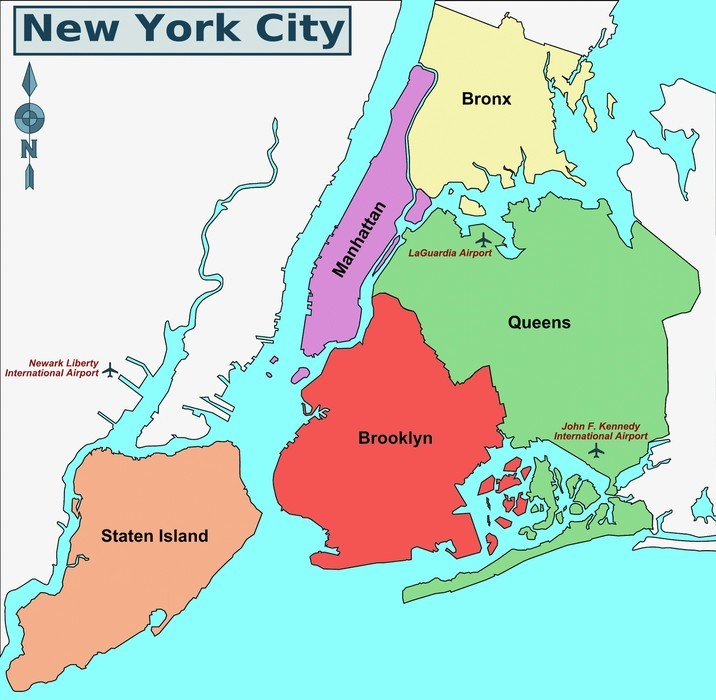



---




# **Dataset Description:**

## **About Airbnb:**
Airbnb is an online rental company accessible via website or mobile app that is primarily used for vacations or casual renting. The company doesn't own any properties; instead, they're privately owned by hosts who choose to share their spaces with strangers. The rental price is set by the host and is influenced by various factors like the property's location, interior and exterior design, and amenities offered. In most cases, a minimum number of days is required to rent the property. To sustain the condition of a home, house rules are decided by the host and must be followed by the guests; failure to abide by these rules may leave the renters liable for damages and repairs. To make a profit and remain under operarations, Airbnb implements a service fee on-top of to the rental price. Each property is assigned a rating ranging from 1 to 5, indicating the level of satisfaction experienced by guests during their stay.

***The dataset exclusively pertains to information about New York City.***

## **Listings**: Summary Data on AirBnB Listings
*Shape: (39719, 18)*
1. **id (int64)**: listing identification number
2. **name (object)**: description of listing
3. **host_id (int64)**: host identification number
4. **host name (object)**: name of host
5. **neighbourhood_group (object)**: major New York borough
6. **neighbourhood (object**): neighbourhood within the borough
7. **latitude (float64**): latitude
8. **longitude (float64)**: longitude
9. **room_type (object)**: rental property type
10. **price (float64)**: daily rental price
11. **minimum_nights (int64)**: minimum nights needed to rent
12. **number_of_reviews: (int64)**: number of reviews on a property
13. **last_review (object)**: date of last review (YYYY-MM-DD)
14. **reviews_per_month (float64)**: average number of reviews per month
15. **calculated_host_listings_count (int64)**: number of properties owned by host
16. **availability_365 (int64)**: number of days within the year the property can be rented
17. **number_of_reviews_ltm (int64)**: reviews in the last 12 months
18. **license (object)**: rental license

## **Reviews**: Reviews For Individual Rentals
*Shape: (1001295, 6)*
1. **listing_id (int64)**: listing identification number
2. **id (int64)**: review identification number
3. **date (object)**: date of review (YYYY-MM-DD)
4. **reviewer_id (int64)**: reviewer identification number
5. **reviewer_name (object)**: name of reviewer
6. **comments (object)**: comments about rental experience

## **Mapping**: Geopandas New York Data
*Shape: (233, 3)*
1. **neighbourhood (object)**: neighbourhood within the borough
2. **neighbourhood_group (object)**: major New York borough
3. **geometry (geometry)**: multipolygon shape that allows for mapping





In [ ]:
display(listings.head(5))
display(reviews.head(5))
display(mapping.head(5))

print(listings.shape)
print(listings.info())

print(reviews.shape)
print(reviews.info())

print(mapping.shape)
print(mapping.info())



---



# **Data Cleaning**:
Modifying our orignial datasets to enhance and strengthen our findings. This includes correcting variable names, column data types, replacing and imputing values, or introducing new features.

## **Domain Exploration**:
Before we begin, we must understand the possible values and categories our data falls into and its overall completeness. To achieve this, we will identify the neighbourhood groups (boroughs), neighbourhoods, rental types, and see which variables are missing observations.

-

### **Unique Values**:
##### **Boroughs**:
There are 5 boroughs in New York:
1. Manhattan
2. Brooklyn
3. Queens
4. Staten Island
5. Bronx

##### **Neighbourhoods**:
There are 224 unique neighbourhoods in New York, the most frequent are:
1. Bedford-Stuyvesant
2. Williamsburg
3. Midtown
4. Harlem
5. Bushwick

##### **Neighbourhoods**:
There are 4 room types that can be rented:
1. Entire home/apt
2. Private room
3. Shared room
4. Hotel

In [ ]:
# Possible Boroughs
display(listings.neighbourhood_group.value_counts().to_frame())

# Possible Neighbourhoods
display(listings.neighbourhood.value_counts().to_frame())

# Possible Rental Types
display(listings.room_type.value_counts().to_frame())

,neighbourhood_group
Manhattan,17436
Brooklyn,14562
Queens,5998
Bronx,1357
Staten Island,366


,neighbourhood
Bedford-Stuyvesant,2795
Williamsburg,2350
Midtown,2199
Harlem,1870
Bushwick,1675
...,...
Lighthouse Hill,1
"Bay Terrace, Staten Island",1
Country Club,1
New Dorp,1


,room_type
Entire home/apt,21062
Private room,17931
Shared room,552
Hotel room,174


### **Missing Values**:
To determine the completeness of the data we will observe which variables are missing observation values and impute them accordingly. Modifications to the missing values will be made in the "Cleaning Process" section.

##### **Findings**:
1. Most columns have complete observations:
      * All observations have identification numbers
      * All observations are assigned a borough and neighbourhood
      * All observations have a specified room type
      * All observations have a geolocation (longitude and latitude)
2. Columns which are missing many values:
      * price: 10628 missing
      * last_review: 11543 missing
      * reviews_per_month: 11543 missing







    



In [ ]:
listings.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             10628
minimum_nights                        0
number_of_reviews                     0
last_review                       11543
reviews_per_month                 11543
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35027
dtype: int64

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001295 entries, 0 to 1001294
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   listing_id           1001295 non-null  int64  
 1   id                   1001295 non-null  int64  
 2   date                 1001295 non-null  object 
 3   reviewer_id          1001295 non-null  int64  
 4   reviewer_name        1001292 non-null  object 
 5   comments             1001061 non-null  object 
 6   punctuation_faults   1001295 non-null  int64  
 7   comment_length       1001295 non-null  int64  
 8   positive_keywords    1001295 non-null  int64  
 9   negative_keywords    1001295 non-null  int64  
 10  mediocre_keywords    1001295 non-null  int64  
 11  review_satisfaction  1001295 non-null  float64
dtypes: float64(1), int64(8), object(3)
memory usage: 91.7+ MB



## **Cleaning Process**:
The dataset we are using was pretty clean to begin with but still requires some changes. Here we will add new columns that contain relevant data, drop columns which we don't require, and handle observations with missing values.

### **Column Modifications**:
#### **Property Features**:
From the *name* column, we can use regular expressions to extract features about the listing as create separate columns for each feature. Some property descriptions are missing some features, but we extracted all the data we could. Listings with missing data will be kept as-is since the descriptions likely left out some information and it would be incorrect to replace missing values with "0" or other numerical values. The following columns were added:

##### **Listings**:
1. rating (object): a review score ranging from 1 to 5 ⇒ 17803 values missing
2. bathrooms (object): number of bathrooms ⇒ 108 values missing
3. beds (object): number of beds ⇒ 906 values missing
4. bedrooms (object): number of bedrooms ⇒ 3385 values missing

##### **Reviews**:
1. comment_length (int64): length of a guest's review about their stay
2. positive_keywords (int64): positive words used in a review
3. negative_keywords (int64): negative words used in a review
4. mediocre_keywords (int64): mediocre words used in a review
5. review_satisfaction (float64): calculates satisfaction from occurences of positive, negative, and mediocre keywords
6. punctuation_faults (int64): the number of punctuation faults in a review

In [ ]:
positive_words = ['amazing', 'excellent', 'wonderful', 'fantastic', 'superb',
    'great', 'awesome', 'beautiful', 'lovely', 'incredible',
    'outstanding', 'perfect', 'fabulous', 'splendid', 'terrific',
    'phenomenal', 'spectacular', 'marvelous', 'charming', 'delightful',
    'cosy', 'comfortable', 'clean', 'spacious', 'stylish',
    'modern', 'cozy', 'convenient', 'luxurious', 'breathtaking',
    'gorgeous', 'homely', 'tidy', 'refreshing', 'serene',
    'peaceful', 'relaxing', 'quiet', 'safe', 'friendly', 'happy'
    'helpful', 'welcoming', 'accommodating', 'responsive', 'attentive',
    'very good', 'good', 'positive', '10 / 10', 'nice', 'thank you','nice',
    'kind', 'pleasant', 'love','cute','enjoy', 'stunning',
    'would recommend', 'would stay here again', 'would stay again',
    'would come back again', 'would definitely stay again',
    'recommend', 'prompt', 'best', 'privacy', 'easy going', 'thanks',
    'hospitality', 'extended our stay', 'worth it', 'flexible', '10/10',
    'organized', 'ideal', 'spotless', 'sweet', 'gracious', 'private',
    'top notch', 'comfy', 'seamless', 'home away from home', 'gem', 'loved',
    'immaculate', 'enjoyed', 'dream', 'nicest', 'beautifully', 'unbeatable',
    'super'
]

negative_words = [
    'terrible', 'horrible', 'awful', 'bad', 'poor',
    'unpleasant', 'disappointing', 'uncomfortable', 'dirty', 'noisy',
    'grimy', 'smelly', 'filthy', 'disgusting',
    'unwelcoming', 'unsafe', 'inconvenient', 'overpriced', 'misleading',
    'rude', 'unfriendly', 'unhelpful', 'disrespectful', 'neglectful',
    'negligent', 'slow', 'unresponsive', 'unsanitary', 'cramped',
    'run-down', 'subpar', 'lousy', 'inferior', 'dated',
    'dingy', 'shabby', 'unappealing', 'uninviting', 'depressing',
    'negative', 'cold', 'not sufficient', 'disagreeable', 'construction',
    'loud', 'not as advertised', 'small', 'dust', 'unbearable',
    'cancel', 'unhappy', 'would not', 'smell', 'never provided'
]

mediocre_words = [
    'average', 'mediocre', 'so-so', 'okay', 'acceptable',
    'decent', 'middling', 'ordinary', 'fair', 'passable',
    'standard', 'tolerable', 'not bad', 'moderate', 'middling',
    'adequate', 'fairly', 'reasonable', 'alright','satisfactory',
    'neutral', 'acceptable', 'run-of-the-mill', 'common', 'standardized',
    'noteworthy',  'usual', 'typical', 'plain', 'simple',
    'unpretentious', 'unadorned', 'ok', 'neat', 'nothing special',
    'as advertised', 'as described', 'okayish'
]

positive_pattern = r'\b' + '(' + '|'.join(positive_words) + ')' + r'\b'
negative_pattern = r'\b' + '(' + '|'.join(negative_words) + ')' + r'\b'
mediocre_pattern = r'\b' + '(' + '|'.join(mediocre_words) + ')' + r'\b'

In [ ]:
# used for regression - these take LONG to load
# extract keywords from reviews
reviews['punctuation_faults'] = reviews.comments.apply(lambda x: len(re.findall(r"((^[^A-Z])|([.?!]\s*[^A-Z\s]))",str(x))))
reviews['comment_length'] = reviews.comments.apply(lambda x: len(str(x)))
reviews['positive_keywords'] = reviews.comments.apply(lambda x: len(re.findall(positive_pattern, str(x).strip().lower())))
reviews['negative_keywords'] = reviews.comments.apply(lambda x: len(re.findall(negative_pattern, str(x).strip().lower())))
reviews['mediocre_keywords'] = reviews.comments.apply(lambda x: len(re.findall(mediocre_pattern, str(x).strip().lower())))
reviews['review_satisfaction'] = 2*reviews['positive_keywords'] - 2*reviews['negative_keywords'] + 0.5*reviews['mediocre_keywords']

# extract features from listing name
listings["bedrooms"] = listings.name.str.extract(r"(?:(\d+) bedroom)")
listings["beds"] = listings.name.str.extract(r"(?:(\d+) bed[^(room)])")
listings["bathrooms"] = listings.name.str.extract(r"(\d+[\.\d]*)\s(?:(?:shared )|(?:private ))?bath")
listings["rating"] = listings.name.str.extract(r"(?:★(\d+\.\d+))")

# how effective was our extraction
print("Missing Values After Extraction:", listings[["bedrooms","beds","bathrooms","rating"]].isna().sum())

display(reviews.head())
display(listings[["id", "name", "bedrooms","beds","bathrooms","rating"]])

bedrooms      3385
beds           906
bathrooms      108
rating       17803
dtype: int64


,listing_id,id,date,reviewer_id,reviewer_name,comments,punctuation_faults,comment_length,positive_keywords,negative_keywords,mediocre_keywords,review_satisfaction
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...,3,731,0,0,0,0.0
1,2595,19176,2009-12-05,53267,Cate,Great experience.,0,17,1,0,0,2.0
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,1,475,7,0,0,14.0
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",2,366,2,0,0,4.0
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,0,155,4,0,0,8.0


### **Dropping Columns**:
From our findings when analyzing the domains, we have decided to remove the following columns for their lack of useful information:

1. **last_review**:
      * The date of the most recent review is not required
      * We'd rather analyze reviews individually
      * There are 11543 missing values
2. **reviews_per_month**:
      * The number of monthly reviews is uncecessary
      * We'd rather analyze reviews individually
      * There are 11543 missing values
3. **number_of_reviews_ltm**:
      * For similar reasons, knowing the number of reviews in the last 12 months doesn't assist our analysis
      * We would rather look at overall rating scores and guest reviews
4. **licenses**:
      * Most of the licenses are not a unique license type
      * The individual license values have no meaning to our analysis, they are long strings that we cannot interpret
5. **availability_365**:
      * The interpretation of these values can easily be misconstrued due to the confusing calculations behind the values. Misinterpreting the values could impact our analysis and for these reasons, we decided to remove this column.
      * Calculation of availabilty provided by dataset author:
        * "The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host."
6. **name**:
      * Since we have extracted the relevant data (beds, baths, rating) from the listing description, we no longer need this column.

In [ ]:
# dropping the unwanted columns
listings.drop(["last_review","reviews_per_month","number_of_reviews_ltm","license", "availability_365", "name"], axis = "columns", inplace = True)

### **Imputations**:
The final issue with our data is that large number of observations which are missing *price* data. To solve this issue, we will fill the missing values with the average price for listings in the same neighbourhood.This process could be improved by also considering the property features (rating, beds, baths) but since some of these values are also missing, it would still produce missing values. The belief is that listings in the same neighbourhood will have similar features, which is why our process should suffice.

#### **Outcome**:
There are now only 2 observations with missing prices, a large reduction from 10628 observations

In [ ]:
# the neighbourhood names are not common between boroughs
listings_clean = listings.copy()

# calculate the average by sub-neighbourhood
neighourhood_avg = listings_clean.groupby(["neighbourhood"]).price.mean().round(2)

# the fill creates a series with neighbourhood_group as the index but these
# indexes repeat so I reset them to follow the original dataframe, and then
# select the column I want (price)
listings_clean.price = listings_clean.set_index("neighbourhood").price.fillna(neighourhood_avg).reset_index().price

listings.set_index("neighbourhood").price.fillna(neighourhood_avg).reset_index().price

# the outcome
listings_clean.price.isna().sum()

2

### **Suspicious Pricing**:
When analyzing the distribution of listing prices using a boxplot, it was discovered that some prices were unusually high, so much so that we couldn't properly analyze the plot below. After using *describe()* and *sort_values()*, we discovered the following:

##### **Summary Statistics**:
1. mean: 213.67
2. median: 150.00
3. standard deviation: 812.05
4. max = 100000

##### **7 Highest Prices**:
1. 100000.0  
2. 100000.0
3. 20500.0
4. 19429.0
5. 19429.0
6. 19429.0
7. 19286.0

The summary statistics tell us that the prices are skewed to the right
since the mean is larger than the median. Also, when we noticed that the mean is relatively small compared to the median, further indicating the wide spead of data and presence of outliers. We conducted individual investigations on several listings available on the Airbnb website, carefully reviewing the amenities and room features of each. Comparing our findings with the prices, we concluded that these high fees were extremely unreasonable for what was being offered. The cause behind these prices is unknown but it may caused by:

1. Host Overvaluation:
  * Setting a high price despite the listing offering very little in terms of features or ammenities.
2. Unique features or Ammenities:
  * The building might be a historical site or provide exlusive sceneries that are not listed.
3. Pricing Mistake:
  * A simple mistake might be caused by a typo or incorrect currency exchange.


count     39717.000000
mean        213.669527
std         812.052157
min          10.000000
25%          95.000000
50%         150.000000
75%         236.620000
max      100000.000000
Name: price, dtype: float64

10397    100000.0
13455    100000.0
27681     20500.0
6783      19429.0
6649      19429.0
6601      19429.0
8291      19286.0
14676     10000.0
11292     10000.0
4989      10000.0
Name: price, dtype: float64

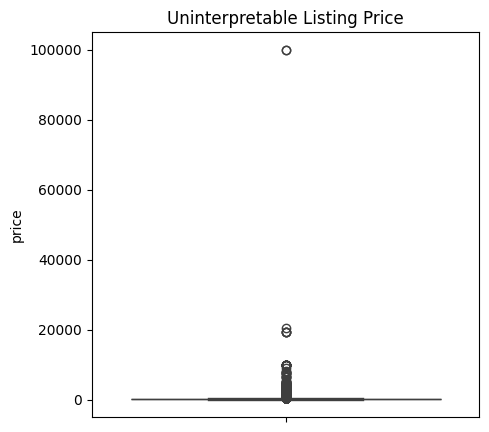

In [ ]:
# show the summary stats for observations with unusual listing prices

display(listings_clean.price.describe())
display(listings.price.sort_values(ascending=False).head(10))

plt.figure(figsize=(5, 5))
plt.title("Uninterpretable Listing Price")
sns.boxplot(listings_clean.price)
plt.show()

#### **Our Solution**:
To reduce the effects of outrageous prices, we implemented a strategy to remove the outliers. Here is the process:
1. Group listings by neighbourhood:
  * Listings within the same neighbourhood should have similar building types, features, and nearby points of interest.
2. Calculate the mean and standard deviation within these groups:
  * We will identify outliers within each group rather than considering all prices.
3. Use the 2 Standard Deviation Rule:
   * Within the groups, if a price varies more than 2 standard deviations from the group average, we will consider it an outlier.


In [ ]:
# calculate the mean of price per group
# then determine the indexes where the price distance from the group mean is less than 2 standard deviations
# select the indexes which fulfil the above condition and use them in a new dataset "filtered_listings"

# think of it like dividing the prices into the separate groups
# then the mean and std would be for the specific group
# meanwhile x is the individual price value

# Good Groupby

filtered_listings = listings_clean[listings_clean.groupby(["neighbourhood"])["price"]
                                        .transform(lambda x: (x - x.mean()).abs() < 2 * x.std())]

#### **Outcomes**:

After performing the described transformation on our data, the summary statistics and 7 highest prices were modified. The standard deviation greatly decreased and so did the 7 highest prices, indicating that we had removed the observations that had the largest impact on the spread and central tendancy of our data. Our data is still skewed but it is an improvement from what we previously had. With the filtered observations, we can now begin the next step of our analysis.

##### **Summary Statistics**:
1. mean: 181.06
2. median: 149.00
3. standard deviation: 157.37
4. max: 4393.00

##### **7 Highest Prices**:
1. 4393.0
2. 4393.0
3. 3560.0
4. 3560.0
5. 2700.0
6. 2700.0
7. 2670.0


Two boxplots are shown below to display the smaller, more controlled spread of the price data. The first plot includes outliers to show the exclusion of the extreme prices while the second plot removes outliers so that you can observe the median, mean, and whiskers.

When creating a boxplot for **ALL** prices you will notice that outliers still exist. This is due to grouping by neighbourhood and filtering based on a price's distance from the neighbourhood average. Our reasoning for this was previously explained but if we had considered all prices as similar entities our results would have been different. Using this alternative approach would have likely lead to a loss of important data which could explain trends within a specific neighbourhood.  

count    38719.000000
mean       181.069568
std        157.372493
min         10.000000
25%         93.000000
50%        149.000000
75%        230.690000
max       4393.000000
Name: price, dtype: float64

8234    4393.0
5039    4393.0
6620    3560.0
8122    3560.0
5674    2700.0
5795    2700.0
8361    2670.0
6631    2670.0
8357    2670.0
1046    2600.0
Name: price, dtype: float64

Text(0.5, 1.0, 'Filtered Listing Price (Outliers Removed)')

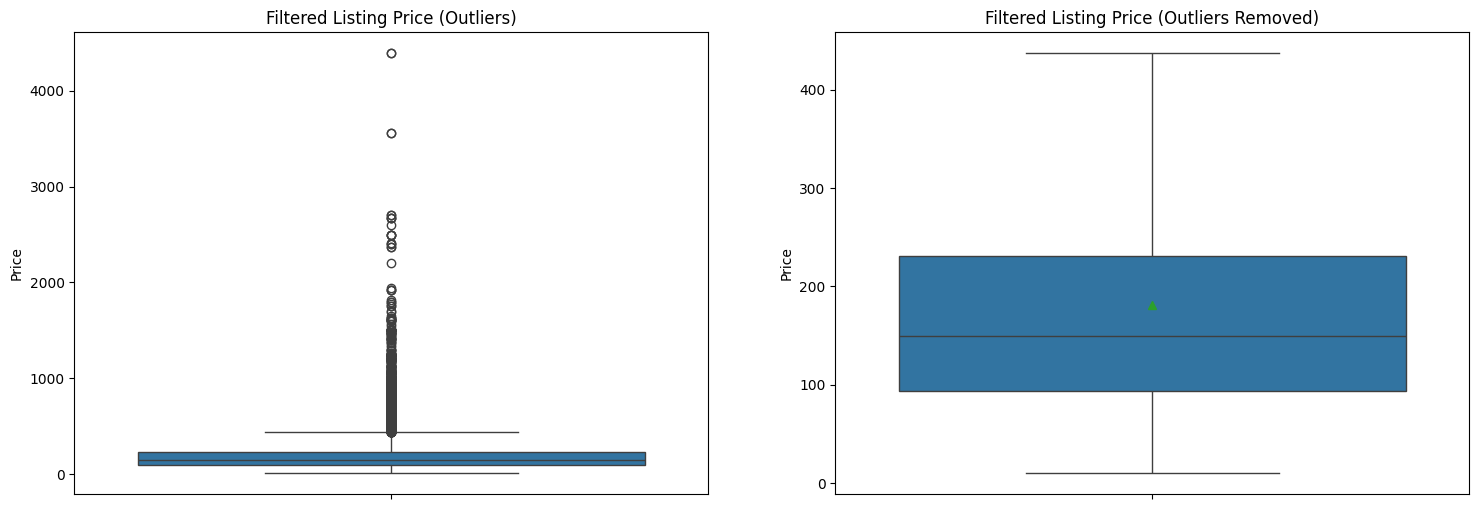

In [ ]:
# Improving from the previous dataset
# Show the summary statistics
display(filtered_listings.price.describe())
display(filtered_listings.price.sort_values(ascending=False).head(10))

# Subplots - Boxplots to show a more controlled spread
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# first show with outliers - since we can't make an analysis, we simplify and remove them
sns.boxplot(filtered_listings.price, ax=axes[0])
axes[0].set_ylabel("Price")
axes[0].set_title("Filtered Listing Price (Outliers)")

# Remove the outliers to analyze median and whiskers
sns.boxplot(filtered_listings.price, showmeans = True, showfliers = False, ax=axes[1])
axes[1].set_ylabel("Price")
axes[1].set_title("Filtered Listing Price (Outliers Removed)")

#filtered_listings[filtered_listings.price > (230.69 + (230.69-93)*1.5)]



---



# **Exploratory Data Analysis**:

## **Initial Thoughts**:
Prior to any in-depth investigations within the data, we developed initial assumptions and preliminary questions we would like to explore. This approach enchances our understanding of the data through identifying general trends; by doing so, we strengthen our final conclusions and possibly discover new topics we would want to explore further.

#### **Expensive Areas**:
*Which borough in New York is the most expensive?*

*Which neighbourhood within these boroughs has the highest average rental costs?*  

*What could be the underlying reasons for these prices?*

-

With our knowledge of New York's tourism and housing market, we know that  Manhattan is recognized for being one of the world's commercial, financial and cultural centres. It's home to New York's famous locations like Wallstreet, Time Square, The Empire State Building, The Statue of Liberty, and countless other attractions. Among these attractions, Central Park is widely considered to have the most significant effect on the housing market. The existence of such landmarks, is the reason why we predict Manhattan to be the most expensive borough. Within Manhattan, the most expensive neighbourhoods might be in close-proximity to the financial district, pointing us toward areas like Tribeca and NoHo.  

-

With the listings filtered to remove outrageous prices, we used boxplots to measure the distribution of prices by borough. The average price in Manhattan surpasses other boroughs at around \$250, whereas Brooklyn, which occupies second place, has an average price of about \$160. On average, listings in The Bronx have the cheapest prices. Rather than simply analyzing the borough, we further specified our investigation to focus on the individual neighbourhood and introducing color to indicate the borough. The majority of the 10 most expensive neighbourhoods are in Manhattan, the highest being SoHo and Tribeca with average prices of around \$700. The most expensive neighbourhood in Brooklyn is Navy Yard with an average price of \$500. The most expensive neighbourhood in Staten Island is Rossville with an average price of $325. The most expensive neighbourhood in The Bronx is Riverdale  with an average price of about \$270. There are no neighbourhoods in Queens which are in the top 10 most expensive New York neighbourhoods which is quite surprising since it was the third most expensive borough.


Text(0.5, 1.0, 'Top 10 Neighbourhoods With Highest Average Price')

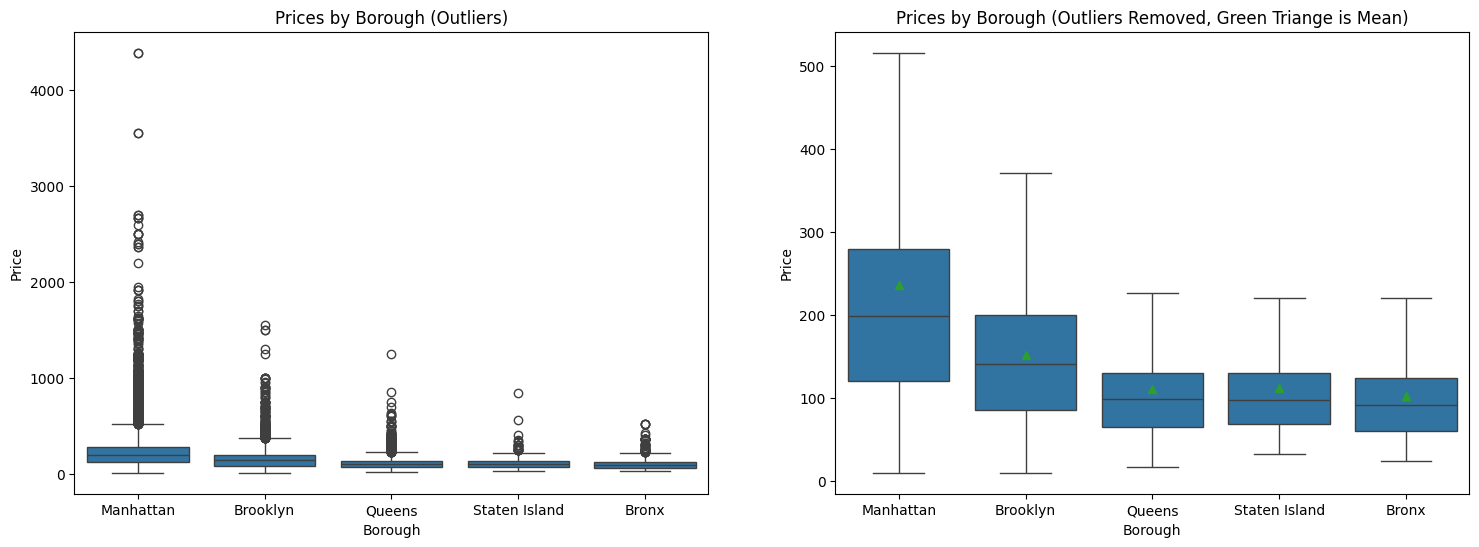

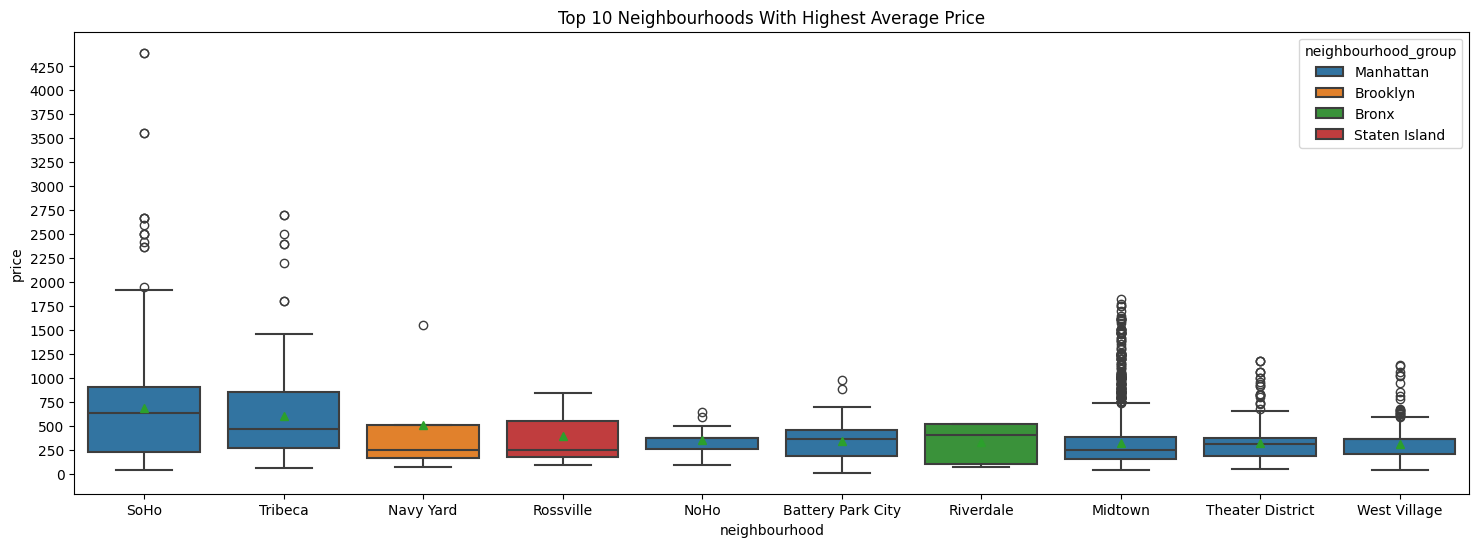

In [ ]:
# using the dataframe which has filtered out outlier prices - filtered_listings

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# first show with outliers - since we can't make an analysis, we simplify and remove them
sns.boxplot(filtered_listings, x = "neighbourhood_group", y = "price", showfliers = True, ax=axes[0])
axes[0].set_xlabel("Borough")
axes[0].set_ylabel("Price")
axes[0].set_title("Prices by Borough (Outliers)")

# then show without outliers, marking the means in green to show skewness
sns.boxplot(filtered_listings, x = "neighbourhood_group", y = "price", showmeans = True, showfliers = False, ax=axes[1])
axes[1].set_xlabel("Borough")
axes[1].set_ylabel("Price")
axes[1].set_title("Prices by Borough (Outliers Removed, Green Triange is Mean)")

# Plot the top 10 neighbourhoods with the highest average price
# filter a dataframe with only the neighbourhoods with the 10 highest averages
top_neighbourhoods = filtered_listings[
    filtered_listings.neighbourhood
    .isin(filtered_listings.groupby(["neighbourhood"]).price.mean()
    .sort_values(ascending = False).head(10).index)]

# get a list of the top neighbourhoods in order of highest average (basically the same thing)
order_scheme = top_neighbourhoods.groupby("neighbourhood").price.mean().sort_values(ascending=False).index

# plot the neighbourhoods - in order of their means (descending)
plt.figure(figsize=(18, 6))
plt.yticks(range(0, 4500, 250))
sns.boxplot(x="neighbourhood", y="price", hue="neighbourhood_group", data=top_neighbourhoods, linewidth=1.5, order = order_scheme, showmeans = True)
plt.title("Top 10 Neighbourhoods With Highest Average Price")

#### **Abundant Rental Type & Location**:

*Which room types are the most common among listings?*

*Which neighbourhoods/boroughs have the most listings?*

*What is the geographical distribution of these rooms?*

-

To understand the renting patterns, we must first know what types of properties are available to rent and where they are located. Among the four room types, we will analyze the proportion of each category relative to the overall market and determine which room types are more abundant. In our analysis, we will also verify which boroughs and neighbourhoods have the most listings to help determine the level of competition within each group. Additionally, we'll visualize the geographic distribution of each room type throughout New York by plotting their respective counts relative to each borough (we'll revisit this topic in a later section).

Without any investigations, we
speculate that private rooms and entire homes will be the most common listings while hotel rooms and shared rooms will have very little prevelance. The reasoning behind this is that guests will be more willing to rent premium private spaces rather than those with less privacy and less security.

-

From our investigations, we can confirm that Manhattan and Brooklyn are the boroughs which have the most listings. To provide a more detailed understanding, we broke down the listings into the smaller neighbourhoods. Although Manhattan is responsible for the most listings, Bedford-Stuyvesant and Williamsburg, neighbourhoods in Brooklyn have the most listings. The majority of the other top neighbourhoods are in Manhattan.

From the second set of plots we confirmed that the most common room type is an entire home or appartment followed by a private room. Once again we break these categories down by borough to view their proportions per group. In Manhattan, entire homes make up about two-thirds of the listings, while private rooms make up the remaining one-third. In Brooklyn, both entire homes and private rooms each make up roughly half of the listings;  private rooms have a slight edge. Then in Queens, the shift becomes more prevalent, we observe that private rooms now make up about two-thirds, while the remaining one-third is comprised of entire homes.



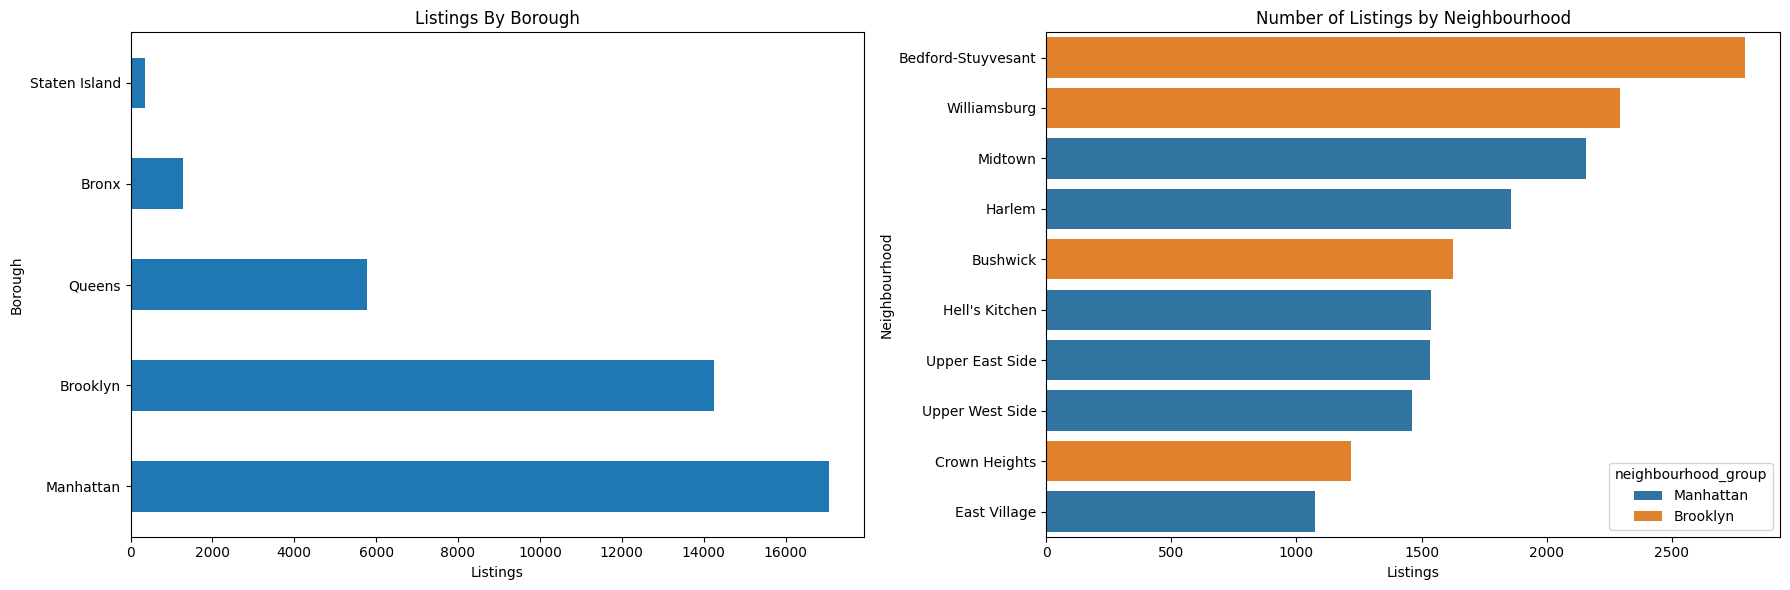

In [ ]:
# Abundant Rental Type & Location
# Subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot listings by borough
filtered_listings.neighbourhood_group.value_counts().plot(kind='barh', ax=axes[0])
axes[0].set_xlabel("Listings")
axes[0].set_ylabel("Borough")
axes[0].set_title("Listings By Borough")

# -------------

# Plot the neighbourhoods with the most listings
neighbourhood_counts = filtered_listings['neighbourhood'].value_counts()
df_filtered = filtered_listings[filtered_listings['neighbourhood'].isin(neighbourhood_counts.head(10).index)]

# apply wouldn't work here since it would only give a size of 10 rows - transform intead to get size of each group
# this hides the error (looked this up)
with pd.option_context('mode.chained_assignment', None):
  df_filtered.loc[:, 'counts'] = df_filtered.groupby("neighbourhood")['neighbourhood'].transform('size')

sns.barplot(y='neighbourhood', x='counts', hue='neighbourhood_group', data=df_filtered, order = neighbourhood_counts.head(10).index, ax=axes[1])
axes[1].set_xlabel("Listings")
axes[1].set_ylabel("Neighbourhood")
axes[1].set_title("Number of Listings by Neighbourhood")

# -------------

plt.tight_layout() # this is so the plots don't overlap
plt.show()

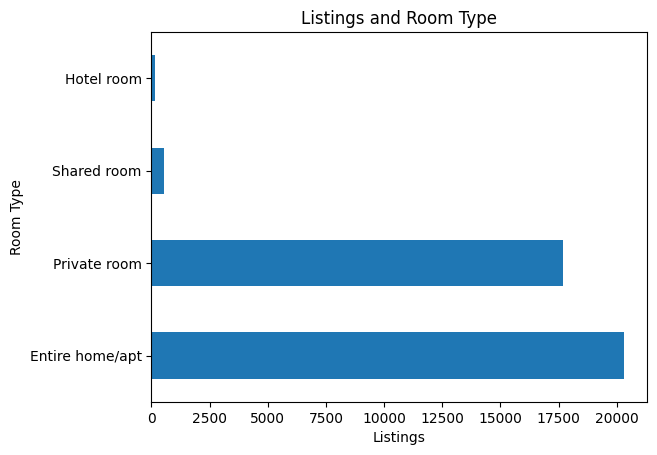

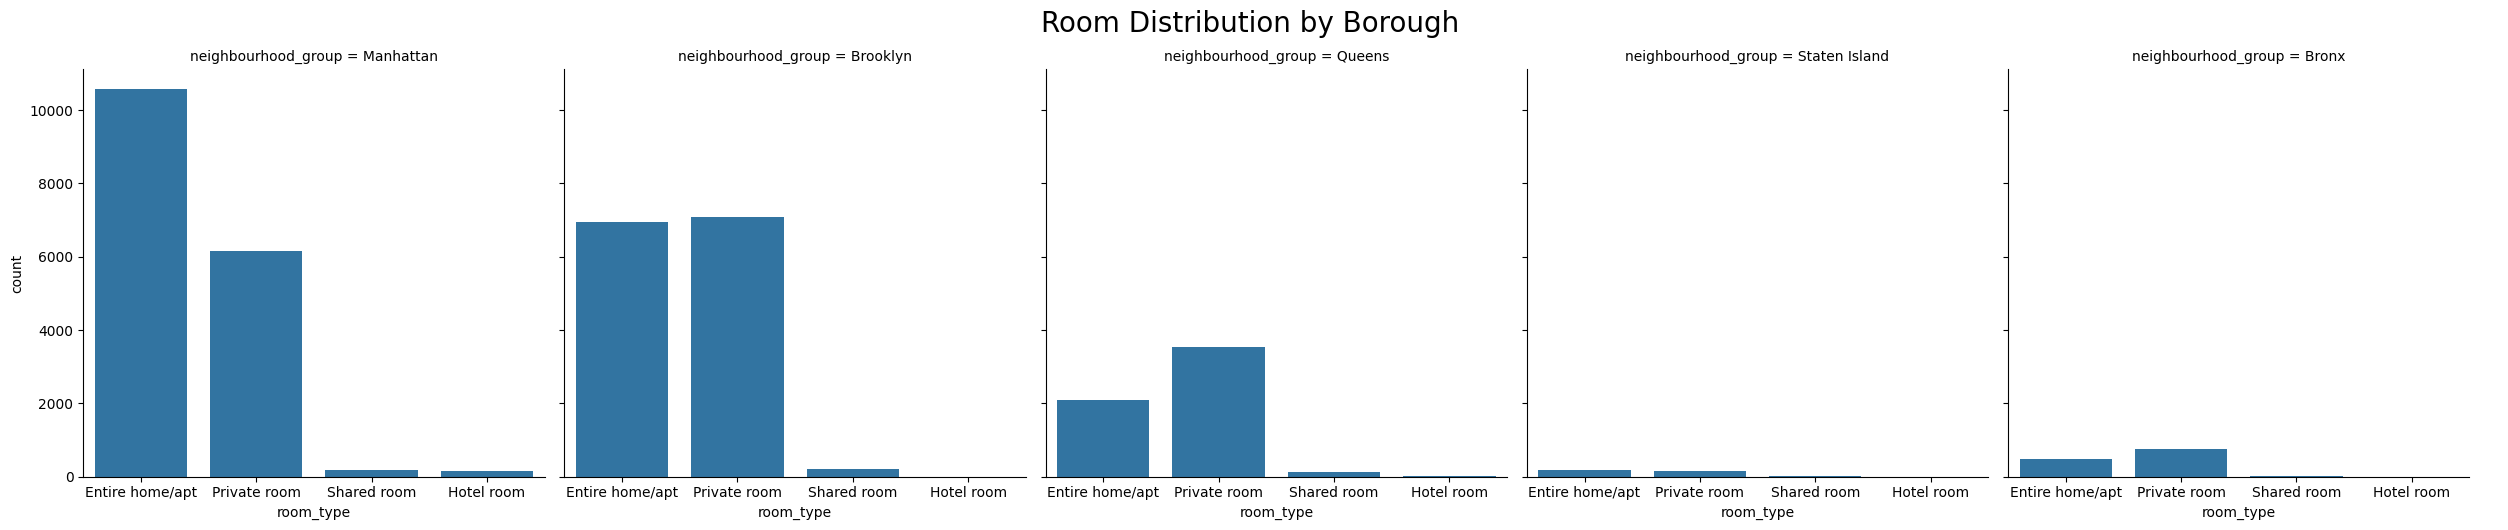

In [ ]:
# Plot the listings by room count
filtered_listings.room_type.value_counts().plot(kind='barh')
plt.xlabel("Listings")
plt.ylabel("Room Type")
plt.title("Listings and Room Type")

# For each borough, break down the counts by room type
sns.catplot(x="room_type", kind="count", col="neighbourhood_group", data=filtered_listings).fig.suptitle("Room Distribution by Borough", y=1.05, fontsize = 20)
plt.show()

#### **Most Active Hosts**:

*How many listings does the typical host own?*

*Which hosts have the most listings?*

*Are these hosts individual people or renting corporations?*

-

To get a better gauge on the level of ownership within New York's renting market, we can investigate the number of properties owned by each host. We anticipate that hosts with more capital will possess a larger number of properties. In other words, rental corporations are expected to own a greater amount of properties compared to individuals.

-

Based on our analysis, it's evident that the majority of hosts have only one listing, followed by a smaller proportion having 10 or more listings. Those with 1 listing are likely individuals who are seeking extra income by renting out one of their properties. On the otherhand, hosts with more than 10 listings can be expected to be larger corporations that have more funds to purchase and manage more properties. Looking at the second plot, there is about an even mix of individuals to corporations who own the majority of properties.
The diagram highlights that Blueground, a rental company, has the highest number of properties. Following closely is Eugene, someone we speculate to be a wealthy individual. On average, it appears that corporate entities like Blueground tend to own more properties than individual renters, likely due to their greater access to funds and market knowledge.

<Axes: title={'center': 'The Number of Listings a Host Has'}, xlabel='Listings By Host', ylabel='Number of Hosts'>

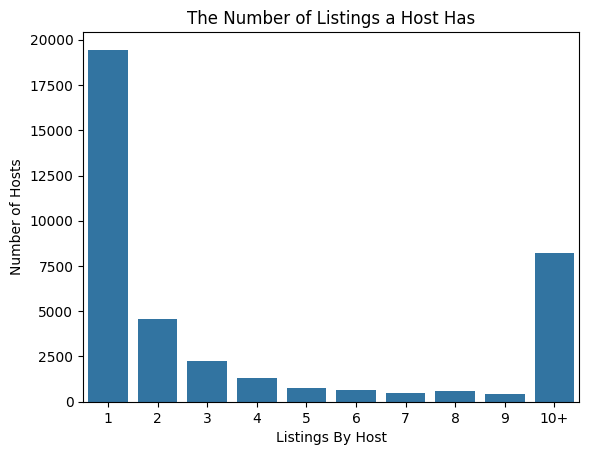

In [ ]:
# Listings by host
# Divide the hosts into groups by the amount of property's / listings they own
# Show how many hosts own a specific number of properties
filtered_listings_properties = filtered_listings.copy()
filtered_listings_properties["category"] = np.where(filtered_listings_properties.calculated_host_listings_count < 10, filtered_listings_properties.calculated_host_listings_count, "10+")

order_scheme = ("1","2","3","4","5","6","7","8","9","10+")

plt.ylabel("Number of Hosts")
plt.xlabel("Listings By Host")
plt.title("The Number of Listings a Host Has")
sns.barplot(filtered_listings_properties.category.value_counts(), order = order_scheme)

# Most Active Host
#filtered_listings.group_by(["host_id","host_name"])

<Axes: title={'center': 'Listings By Host'}, xlabel='Host', ylabel='Listings'>

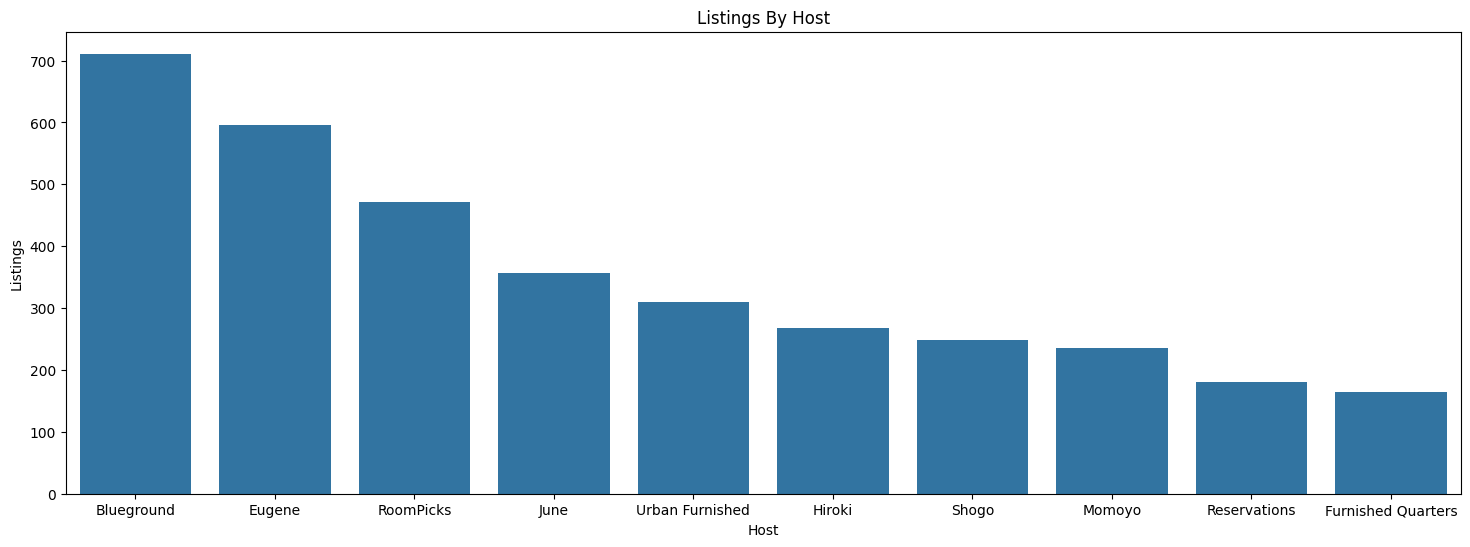

In [ ]:
# get the 10 hosts with the most listings - have to recalculate the calculated_host_listings_count column
# important to group by both variables since people can have the same name
frequent_hosts = filtered_listings.groupby(["host_id","host_name"]).agg("count").id.sort_values(ascending = False).reset_index().set_index("host_name").head(11).index
frequent_hosts_df = filtered_listings[filtered_listings.host_name.isin(frequent_hosts)]

# There was a small hiccup here:
# There were two "RoomPicks" with the same hostname but different host_id numbers, that's why it's head(11)
# I assumed they are the same business just operating under different ids
order_scheme = frequent_hosts_df.host_name.value_counts().index

fig, ax = plt.subplots(figsize=(18, 6))

ax.set_xlabel("Host")
ax.set_ylabel("Listings")
ax.set_title("Listings By Host")

sns.barplot(frequent_hosts_df.host_name.value_counts(), order = order_scheme)

#### **Rental Term**:

*What are the proportions of the minimum rental nights?*

*Are AirBnB listings more commonly long or short term?*

-

To further understand the behaviour of hosts and guests, we can explore the minimum number of nights required for each listing. This will allow us the understand whether the market is more geared towards long or short-term stays. For our analysis, we set a threshold of below 30 days as a short-term rental, anything 30 days or more will be considered long-term. Hosts may prefer offering a longer stay to reduce property upkeep and attract more accountable renters. We suspect that less responsible individuals looking for a weekend getaway are typically those who rent short-term, and are more likely to cause property damage or disobey house rules. For these reasons, we expect that the typical stay duration will be longer rather than short.

-

Our initial beliefs were correct, a large majority of the listings are over 30 days in length.


Text(0.5, 1.0, 'Durations of AirBnB Stays (30+ is Long-Term)')

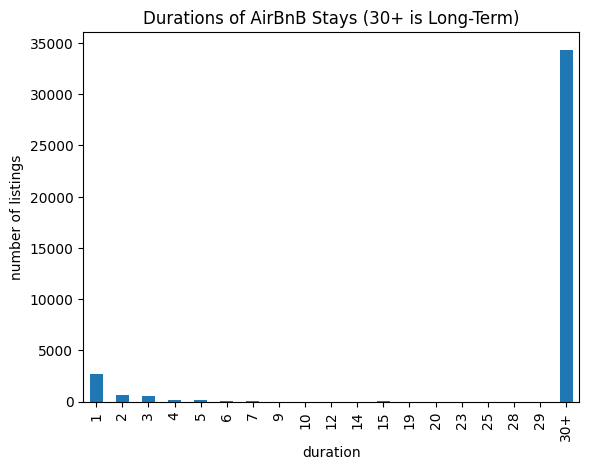

In [ ]:
listings_durations = filtered_listings.copy()
listings_durations["duration"] = np.where(listings_durations.minimum_nights < 30, listings_durations.minimum_nights, "30+")

custom_order = ['1', '2', '3', '4', '5', '6', '7', '9', '10', '12', '14', '15', '19', '20', '23', '25', '28', '29', '30+']
listings_durations['duration'].value_counts().reindex(custom_order).plot(kind = "bar")

plt.xlabel("duration")
plt.ylabel("number of listings")
plt.title("Durations of AirBnB Stays (30+ is Long-Term)")




---



# **Further Analysis**:
In this section we will apply new techniques to develop insightful conclusions. These approaches will make use of merging to join related data together and combine all of our modified tables to create regression models. Our regression models will attempt to determine relationships between our predictors and response variables.

**Merging Usage**:
1. Combine filtered listing data with mapping data to plot rental information on a map of New York using longitude and latitude
2. Combine filtered listing data with review data to make comparisons between pricing and guest satisfaction possible
**Regression Usage**:
1. Develop a various models to attempt to discover relationships between a wide range of predictors and price. These models will extend our exploratory data analysis findings.

## **Geographical Listing Location**:
This is a continuation from our previous section where we were interested in analyzing the distribution of room types across New York. Rather than showing simple barplots to indicate counts, it is equally as important to show the density of listings and where each type of listing is located. This will allow guests to identify exact areas with listings while also providing hosts insight about the level of competiton within their borough or neighbourhood.

We also expand on our findings about the most expensive neighbourhoods. Earlier we plotted the neighbourhoods with the highest average rental price but this analysis didn't give us information about the geographical location about the region. Without the location, it is difficult to determine if being closer to certain landmarks has an effect on price.

-

As expected from our previous plot, Manhattan and Brooklyn visually are the  boroughs with the greatest listing density. This information leads us to believe that they also exhibit the most competition, likely causing hosts to price their listings in a competitive manner. In most cases, we observe that Manhattan, Brooklyn, Queens, and  The Bronx have a pretty even geographical distribution of listings across each borough. It also seems like the islands (Staten Island & part of Queens) have very minimal listings. The majority of the listings seem to be more north rather than south. In general, the majority of listings are densest near Manhattan and fade the farther away you get. It is also worth mentioning that the majority of hotels are in Manhattan and the amount of shared room listings are pretty similar across Manhattan, Brooklyn, and Queens.

The majority of the most expensive neighbourhoods are found within the highlighted red box. This box surrounds Manhattan's financial district, leading us to conclude that the closer you are to this district, the more expensive the prices will be.

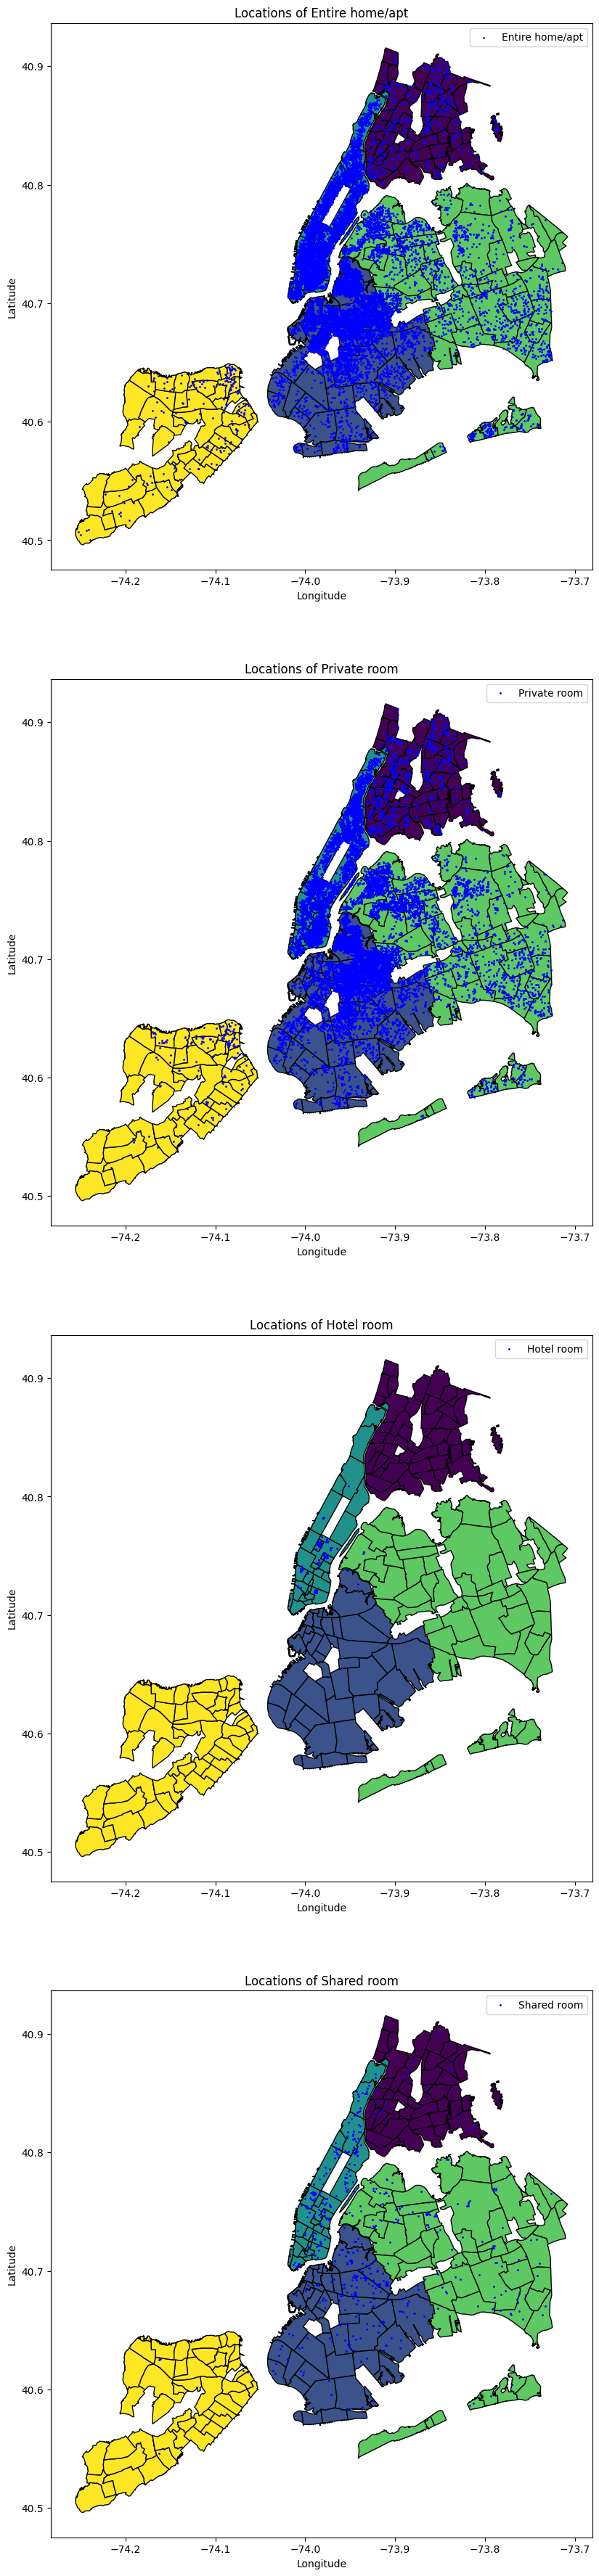

In [ ]:
list_map = pd.merge(mapping, listings, how = 'left', on = 'neighbourhood')
list_map = list_map[['neighbourhood', 'neighbourhood_group_y', 'price', 'bedrooms', 'beds', 'room_type', 'geometry', 'longitude', 'latitude']]

# when you call plot on a geopandas df, it automatically knows that latitude and longitude are the axis values (cool)
# so then color the map by borough and edge the neighbourhoods with black- cividis for colorblindess
fig, axes = plt.subplots(4, 1, figsize=(45, 45))

# Entire home/apt
mapping.plot(column='neighbourhood_group', cmap='viridis', edgecolor='black', ax=axes[0])
list_map[list_map["room_type"] == "Entire home/apt"][["longitude","latitude"]].plot(kind="scatter", x="longitude", y="latitude", color="blue", label="Entire home/apt", s=1, ax=axes[0])

axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].set_title("Locations of Entire home/apt")

# Private room
mapping.plot(column='neighbourhood_group', cmap='viridis', edgecolor='black', ax=axes[1])
list_map[list_map["room_type"] == "Private room"][["longitude","latitude"]].plot(kind="scatter", x="longitude", y="latitude", color="blue", label="Private room", s=1, ax=axes[1])

axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].set_title("Locations of Private room")

# Hotel
mapping.plot(column='neighbourhood_group', cmap='viridis', edgecolor='black', ax=axes[2])
list_map[list_map["room_type"] == "Hotel room"][["longitude","latitude"]].plot(kind="scatter", x="longitude", y="latitude", color="blue", label="Hotel room", s=1, ax=axes[2])

axes[2].set_xlabel("Longitude")
axes[2].set_ylabel("Latitude")
axes[2].set_title("Locations of Hotel room")

# Shared
mapping.plot(column='neighbourhood_group', cmap='viridis', edgecolor='black', ax=axes[3])
list_map[list_map["room_type"] == "Shared room"][["longitude","latitude"]].plot(kind="scatter", x="longitude", y="latitude", color="blue", label="Shared room", s=1, ax=axes[3])

axes[3].set_xlabel("Longitude")
axes[3].set_ylabel("Latitude")
axes[3].set_title("Locations of Shared room")

plt.show()

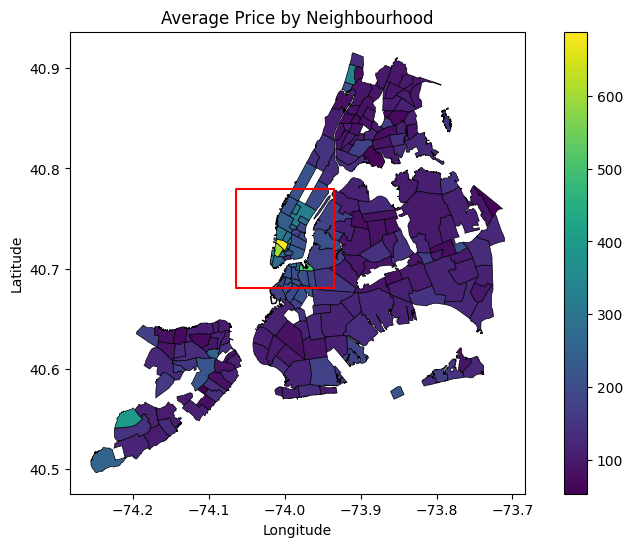

In [ ]:
# get average price of neighbourhoods
# df of index, neighbourhood, and price
average_price = filtered_listings.groupby('neighbourhood')['price'].mean().reset_index()

# merge the average price data with the geometry data
merged_data = mapping.merge(average_price, on='neighbourhood')

# plot the merged data
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='price', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

# plot Focus - facecolors = none is for unfilled shaped
plt.scatter(-74.0, 40.73, color='red', marker='s', facecolors='none',  s = 5000, linewidth=1.5)

plt.title('Average Price by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# regression, wordmap (unnecessary), review

## **Regression Analysis**:
This section seeks to expand our earlier findings by developing regression models to determine the strength of the relationship between various predictors and the listing price. These models are based on our discoveries from our exploratory data analysis.

In [ ]:
filtered_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'bedrooms',
       'beds', 'bathrooms', 'rating', 'neighbourhood_counts',
       'borough_counts'],
      dtype='object')

#### **Neighbourhood Density**:
Earlier we explored the number of listings within a neighbourhood and plotted their geographical locations. We will now explore whether the number of listings within a neigbourhood or borough (density) has an impact on the pricing. Having more listings may increase competition and introduce interesting pricing strategies to attract guests aways from other hosts.

-

##### **Model 1**: Neighbourhood Density
1. β$_0$: 170.147
  - The baseline price of listings when other predictors are 0
2. β$_{neighbourhood\_counts}$: 0.01045025
  - For every new listing (1 unit increase) within a neighbourhood, the rental price increase by approximately 1.04 ¢
3. R$^{2}$: 0.0033
  - The model isn't effective at capturing the variance in price

##### **Model 2**: Borough Density
1. β$_0$: 52.446
  - The baseline price of listings when other predictors are 0
  - Larger than the neighbourhood estimate since the counts within a borough are greater than a single neighbourhood
2. β$_{borough\_counts}$: 0.00940588
  - For every new listing (1 unit increase) within a borough, the rental price increase by approximately 0.94 ¢
3. R$^{2}$: 0.0756
  - The model isn't effective at capturing the variance in price

##### **Density Conclusions**:
Simply looking at the coefficient estimates, we observed that as the number of listings within a region increases, the prices also increase. This may be due to various factors such as heightened competition among renters, landlords capitalizing on a growing market, or an increase of high-income renters seeking housing in the area. Although we cannot develop a certain conlusion about either relationship due to their extremely low R-Squared values. A simple linear regression may not be sufficient, more predictors must be included due to the complexity of prices.

In [ ]:
# column for listings within a neighbourhood - did this process in an earlier section
with pd.option_context('mode.chained_assignment', None):
  filtered_listings["neighbourhood_counts"] = filtered_listings.groupby("neighbourhood")['neighbourhood'].transform('size')

with pd.option_context('mode.chained_assignment', None):
  filtered_listings["borough_counts"] = filtered_listings.groupby("neighbourhood_group")['neighbourhood_group'].transform('size')

# does neighbourhood listing density affect price?
# First model
X = filtered_listings[["neighbourhood_counts"]]
y = filtered_listings['price']
regr = lm.LinearRegression()
regr.fit(X, y)
print("Model 1:")
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
print("R2:",regr.score(X, y))

# how about listings within a borough?
# Second model
X = filtered_listings[["borough_counts"]]
y = filtered_listings['price']
regr = lm.LinearRegression()
regr.fit(X, y)
print("\nModel 2:")
print("Intercept:",regr.intercept_)
print("Coefficients:",regr.coef_)
print("R2:",regr.score(X, y))

# a simple linear regression model isn't complex enough, we must expand our predictors
# density alone isn't enough to predict price

Model 1:
Intercept: 170.14780256172608
Coefficients: [0.01045025]
R2: 0.003327201631097343

Model 2:
Intercept: 52.446562574268796
Coefficients: [0.00940588]
R2: 0.07568369137168751


#### **Host Activity**: Properties Owned & Listing Duration
We previously investigated the number of properties owned by each host and the minimum number of nights that they require guests to stay. These measurements can be described under *Host Activity* since they are indicative how the amount of time a host must exert to maintain a property, greatly scaled by the number of properties they own. If a host must spend more time with guests and upkeep their listings, they may charge a greater price for their services.

-

##### **Model 1**: Host Activity
1. β$_0$: 194.05812845238773
  - The baseline price of listings when the number of listings and minimum nights are zero
2. β$_{minimum\_nights}$: -0.49231369
  - For every one night required to book a listing, the rental price decreases by approximately 49.2 ¢
3. β$_{calculated\_host\_listings\_count}$: 0.03883001
  - For every one property a host rents out, the rental price increases by approximately 3.8 ¢
4. R$^{2}$: 0.009555355915784158
  - The model isn't effective at capturing the variance in price

##### **Host Activity Conclusions**:
By analyzing the coefficients, we observe that when hosts consider the amount of time they have to invest into a property, they set a baseline price of about $194. When they take the number of properties they have into account, they tend to increase their rental price by 3¢ per property they own. This is likely because as they have more properties to inspect, they have more work to complete and may feel that this amount of work should be compensated. Also, it seems like they reduce prices by about 49¢ per night stayed, possibly giving better deals to renters who commit long-term to properties, reducing the amount of work the host needs to do. Unfortunately, the R-Squared for this model is also extremely low, making it impossible to develop any meaningful conclusions. Our following models will attempt to use more predictors in hopes of improving the R-Squared.

In [ ]:
# does the host activity affect the price? (owned properties and minimum stays)

# First model
X = filtered_listings[["minimum_nights","calculated_host_listings_count"]]
y = filtered_listings['price']
regr = lm.LinearRegression()
regr.fit(X, y)
print("Model 1:")
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
print("R2:",regr.score(X, y))


Model 1:
Intercept: 194.05812845238773
Coefficients: [-0.49231369  0.03883001]
R2: 0.009555355915784158


#### **Intermediate Merge Step**:
Here we are merging the listings and reviews datasets to gain more insights on each listing by its corresponding client review. We joined the two datasets on 'id' (foreign key) for our listings and 'listing_id' (primary key) for the reviews.



In [ ]:
complete_listings = filtered_listings.merge(reviews, how = "left", left_on = "id", right_on = "listing_id")
complete_listings = complete_listings[['id_x', "neighbourhood_group", "room_type", "price", "beds", "bathrooms", "rating", "punctuation_faults", "positive_keywords", "negative_keywords", "mediocre_keywords", "comment_length", "review_satisfaction"]]
complete_listings.head()

,id_x,neighbourhood_group,room_type,price,beds,bathrooms,rating,punctuation_faults,positive_keywords,negative_keywords,mediocre_keywords,comment_length,review_satisfaction
0,21935608,Manhattan,Entire home/apt,236.62,1,1,4.67,0.0,7.0,0.0,0.0,451.0,14.0
1,21935608,Manhattan,Entire home/apt,236.62,1,1,4.67,0.0,5.0,0.0,0.0,300.0,10.0
2,21935608,Manhattan,Entire home/apt,236.62,1,1,4.67,0.0,4.0,0.0,0.0,176.0,8.0
3,21935608,Manhattan,Entire home/apt,236.62,1,1,4.67,0.0,2.0,0.0,0.0,230.0,4.0
4,21935608,Manhattan,Entire home/apt,236.62,1,1,4.67,0.0,6.0,0.0,0.0,491.0,12.0


#### **Property Features**: Location, Room Type, Beds, and Bathrooms
After cleaning and exploratory analysis, we are able to fit a model to predict the price of a New York City AirBnB listing. The correlation plots between the quantitative variables from the two datasets showed that the rating and the punctuation mistakes do not have any correlation with price at all. To enhance our model we used insights from previous visualizations to implement neigbourhood_group and room_type as predictors. Since they are non-ordinal qualitative variables, we created dummy variables in their place to express their relationship with price.

Unfortunately, New York City real estate pricing is so complex and unpredicable that a variety of predictors not included in the dataset is needed to accurately predict prices. Which is why the $R^2$ value is 0.28.

For this model, here are the coefficients:

$\beta_0$ = - 111695127044436.55

This is the theoretical price of a New York AirBnB listing when all other predictors are zero.

$\beta_{beds}$ = 2.35160109e+01

$\beta_{bathrooms}$ = 5.93932218e+01

The above coefficients come from quantitative predictors which mean that a 1 unit increase in their respective variable will cause a $\beta$ increase in the price.

$\beta_{Bronx}$ = -2.39382653e+13

$\beta_{Manhattan}$ = -2.39382653e+13

$\beta_{Staten Island}$ = -2.39382653e+13

$\beta_{Brooklyn}$ = -2.39382653e+13

$\beta_{Home/Apt}$ = 1.35633392e+14

$\beta_{Hotel}$ = 1.35633392e+14

$\beta_{PrivateRoom}$ = 1.35633392e+14

$\beta_{SharedRoom}$ = 1.35633392e+14

These dummy variables contain coefficients that increase the price by $\beta$ if their feature is present.

-

These coefficients are somewhat difficult to interpret due to their large values but we can conclude the following:
1. Increasing the number of features (beds, baths) will increase the value of the property by the provided values.
2. The location of the listing seems to always have a negative effect on the price, this effect is similar for all boroughs.
3. The room type itself seems to have the largest positive effect on price.

In [ ]:
complete_listings['rating'] = pd.to_numeric(complete_listings['rating'])
complete_listings['beds'] = pd.to_numeric(complete_listings['beds'])
complete_listings['bathrooms'] = pd.to_numeric(complete_listings['bathrooms'])
complete_listings['punctuation_faults'] = pd.to_numeric(complete_listings['punctuation_faults'])
complete_listings_quant = complete_listings[["beds", "bathrooms", "rating", "punctuation_faults", "price","review_satisfaction", "comment_length"]]

# correlation matrix
display(complete_listings_quant.corr())
#complete_listings['rating'].fillna(complete_listings['rating'].mean(), inplace=True)

model_listings = complete_listings[["beds", "bathrooms","neighbourhood_group", "room_type", "price"]]
model_listings = pd.get_dummies(model_listings, columns = ['neighbourhood_group', "room_type"])
model_listings.dropna(inplace = True)
X = model_listings[["beds", "bathrooms", "neighbourhood_group_Bronx", "neighbourhood_group_Manhattan", "neighbourhood_group_Queens", "neighbourhood_group_Staten Island", "neighbourhood_group_Brooklyn", "room_type_Entire home/apt", "room_type_Hotel room", "room_type_Private room", "room_type_Shared room"]]
y = model_listings['price']

regr = lm.LinearRegression()
regr.fit(X,y)
print('model intercept :', regr.intercept_)
print('model coefficients : ', regr.coef_)
print('Model score : ', regr.score(X, y))


,beds,bathrooms,rating,punctuation_faults,price,review_satisfaction,comment_length
beds,1.000000,0.312168,-0.003615,0.009006,0.349876,-0.011710,0.025416
bathrooms,0.312168,1.000000,0.030988,0.007670,0.269389,0.014000,0.016446
rating,-0.003615,0.030988,1.000000,-0.000915,0.085926,0.192213,0.034561
punctuation_faults,0.009006,0.007670,-0.000915,1.000000,0.006093,0.149918,0.486348
price,0.349876,0.269389,0.085926,0.006093,1.000000,0.062618,0.042663
review_satisfaction,-0.011710,0.014000,0.192213,0.149918,0.062618,1.000000,0.462207
comment_length,0.025416,0.016446,0.034561,0.486348,0.042663,0.462207,1.000000


model intercept : -111695127044436.55
model coefficients :  [ 2.35160109e+01  5.93932218e+01 -2.39382653e+13 -2.39382653e+13
 -2.39382653e+13 -2.39382653e+13 -2.39382653e+13  1.35633392e+14
  1.35633392e+14  1.35633392e+14  1.35633392e+14]
Model score :  0.272558814855863


#### **Customer Satisfaction:**

To fully understand what factors affect the satisfaction of a renter for AirBnB, we must fit a regression model to our calculated feature of "review satisfaction". This feature shows an increased value when the client submits a review with positive language and decreases in value when the language is negative.

In this model we used 'comment_length' and 'punctuation_faults' to predict 'review_satisfaction'. The model returned a coefficient of determination of 0.22 which indicates a weak relationship between the predictors and response.

$R^2$ = 0.22

The coefficients in this model are as follows:

$\beta_0$ = 4.0771511417811865

$\beta_{comment\_length}$ = 0.01013085

$\beta_{punctuation}$ = -0.35078439

-

From our coefficients, we can determine that guests arrive relatively happy to the AirBnB listing with an initial satisfaction score of about 4.07. Throughout their stay, their intial impression may change based on various factors contributing to their experience. To measure their satisfaction after their rental period, we used the length of their review and the number of punctuation faults within their review to predict how they enjoyed their experience. As comment lengths increase, it seems that guests were more satisfied with their stay. If they really enjoyed their time at the property, they might be inclined to write a longer review to praise the host and recommend this listing to other renters. On the other hand, as the number of punctuation faults increase, satisfaction seems to fall. A larger amount of errors may be due to dissatisfied guests quickly typing a poor review out of anger and not worrying about any gramatical errors.



In [ ]:
model_2_listings = complete_listings[["comment_length", "punctuation_faults", "review_satisfaction"]].dropna()
X = model_2_listings[["comment_length", "punctuation_faults"]]
y = model_2_listings['review_satisfaction']

reg_model = lm.LinearRegression()
reg_model.fit(X,y)
print('model intercept :', reg_model.intercept_)
print('model coefficients : ', reg_model.coef_)
print('Model score : ', reg_model.score(X, y))
# complete_listings.isna().sum()

model intercept : 4.0771511417811865
model coefficients :  [ 0.01013085 -0.35078439]
Model score :  0.22097857988562875




---

